## Exploratory Data Analysis and Visualization

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
aviation = pd.read_csv('../Data/AviationFinal.csv')
aviation.head()

In [ ]:
aviation.info()

### Count plots for categorical data

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(20,20))

sb.countplot(x='InvestigationType',data=aviation, ax=axes[0,0])
sb.countplot(x='WeatherCondition',data=aviation, ax=axes[0,1])
engine = sb.countplot(x='EngineType',data=aviation, ax=axes[2,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.countplot(x='BroadPhaseOfFlight',data=aviation, ax=axes[2,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.countplot(x='AircraftDamage',data=aviation, ax=axes[1,0])
sb.countplot(x='Month',data=aviation, ax=axes[1,1])

### Strip plots showing Total Injuries by categorical values

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(20,20))
engine = sb.stripplot(x="EngineType",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,0])
engine.set_xticklabels(engine.get_xticklabels(),rotation=90)
phase = sb.stripplot(x="BroadPhaseOfFlight",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[1,1])
phase.set_xticklabels(phase.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,0])
sb.stripplot(x="WeatherCondition",y="TotalInjuries", data=aviation, palette="coolwarm",ax=axes[0,1])

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(20,20))

sb.stripplot(x="AircraftDamage",y="TotalInjuries", data=aviation, palette="coolwarm", ax=axes[0,0])
sb.stripplot(x="AircraftDamage",y="TotalFatalInjuries", data=aviation, palette="coolwarm", ax=axes[0,1])
sb.stripplot(x="AircraftDamage",y="TotalSeriousInjuries", data=aviation, palette="coolwarm", ax=axes[1,0])
sb.stripplot(x="AircraftDamage",y="TotalMinorInjuries", data=aviation, palette="coolwarm", ax=axes[1,1])
sb.stripplot(x="AircraftDamage",y="TotalUninjured", data=aviation, palette="coolwarm", ax=axes[2,0])

### Strip plots showing total injuries based on time and aircraft damage

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20,10))

year = sb.stripplot(x="Year",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[0])
year.set_xticklabels(year.get_xticklabels(),rotation=90)
sb.stripplot(x="Month",y="TotalInjuries",data=aviation,hue='AircraftDamage',palette='Set1', ax=axes[1])

### Line plots showing total injuries over time

NameError: name 'aviation' is not defined

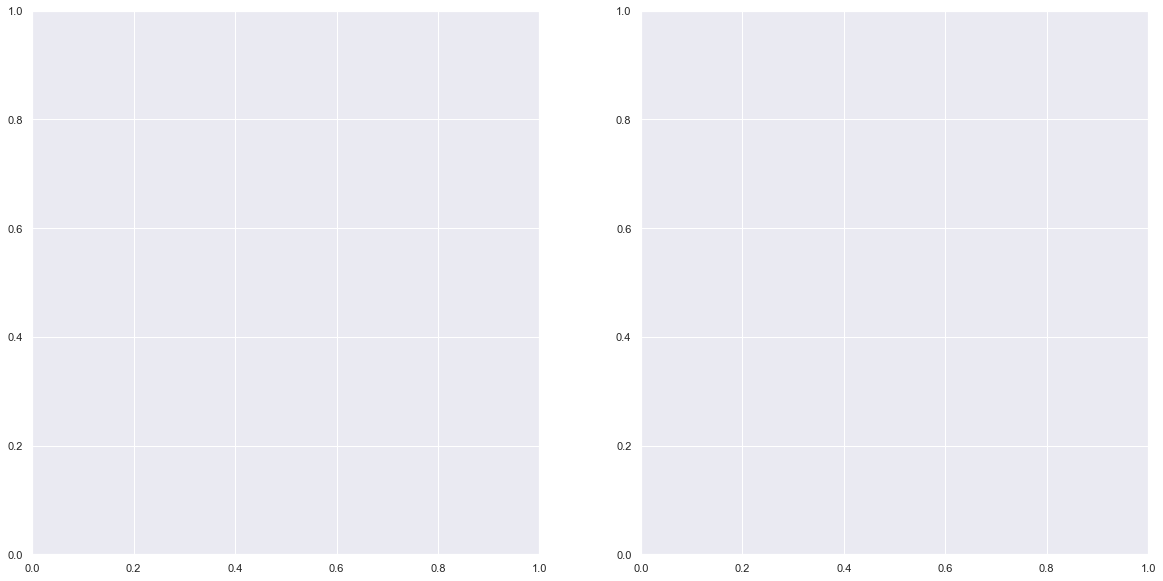

In [3]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
year = sb.lineplot(x="Year", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[0])
year.set_xticklabels(year.get_xticklabels(),rotation=90)
sb.lineplot(x="Month", y="TotalInjuries",hue="AircraftDamage", data=aviation, ax=axes[1])

### Grouping investigation types with weather conditions

In [ ]:
pd.DataFrame(aviation.groupby(['WeatherCondition', 'InvestigationType']).size())

### Grouping investigation types with engine types

In [ ]:
pd.DataFrame(aviation.groupby(['EngineType', 'InvestigationType']).size())

### Grouping investigation type, weather condition by engine type

In [ ]:
pd.DataFrame(aviation.groupby(['EngineType', 'WeatherCondition', 'InvestigationType']).size())

### Plotting on map
> Total accidents across the world

In [ ]:
import matplotlib.pyplot as plt
aviation.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, figsize=(15,10))
plt.show()

> Total injuries across the world

In [ ]:
aviation.plot(kind="scatter", x="Longitude", y="Latitude",
    c="TotalInjuries", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(15,10),
)
plt.legend()
plt.show()

In [ ]:
aviation['Country'].value_counts()

# Nullity Matrix
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion

In [ ]:
import missingno as msno
msno.matrix(aviation.head(20000))

# Heatmap
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

In [ ]:
msno.heatmap(aviation)

##Corelation

In [ ]:
aviation.corr()

In [ ]:
accidents_per_year =df.groupby('Year').size()
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
accidents_per_year.plot(ax=subplot, marker = 'o')
subplot.set_xlabel('Accident Year')
subplot.set_ylabel('# of Accidents')
subplot.set_title('Accident per Year')

In [ ]:
aviation['Report_Status'].unique

##piechart for report status

In [ ]:
countNoFactual = len(aviation[aviation.ReportStatus == 'Factual'])
countNoProbable = len(aviation[aviation.ReportStatus == 'Probable Cause'])
countNoPreliminary = len(aviation[aviation.ReportStatus == 'Preliminary'])
countNoForeign = len(aviation[aviation.ReportStatus == 'Foreign'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Factual', 'Probable Cause', 'Preliminary', 'Foreign']
students = [countNoFactual, countNoProbable, countNoPreliminary, countNoForeign]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()


##pie chart for engine types

In [ ]:
countNoReciprocating = len(aviation[aviation.EngineType == 'Reciprocating'])
countNoTurbo_Prop = len(aviation[aviation.EngineType == 'Turbo Prop'])
countNoTurbo_Jet = len(aviation[aviation.EngineType == 'Turbo Jet'])
countNoTurbo_Fan = len(aviation[aviation.EngineType == 'Turbo Fan'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Reciprocating', 'Turbo Prop', 'Turbo Jet', 'Turbo Fan']
students = [countNoReciprocating,countNoTurbo_Prop , countNoTurbo_Jet, countNoTurbo_Fan]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

##Observations In many investigation cases Engine Type is reciprocating

In [4]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from IPython.display import HTML, display

##Let's draw the map to see the total Fatal injuries By Location

In [6]:
m = folium.Map(location=[30, 20], zoom_start=3)

m.add_child(HeatMap(zip(aviation['Latitude'],
                           aviation['Longitude'], 
                           aviation['TotalFatalInjuries']),
                           min_opacity = 0.2))

FastMarkerCluster(data=list(zip(aviation['Latitude'].values, aviation['Longitude'].values))).add_to(m)
folium.LayerControl().add_to(m)

display(m)

NameError: name 'aviation' is not defined

##Let's draw the map to see the total Uninjureds By Location 

In [ ]:
p = folium.Map(location=[30, 20], zoom_start=3)

p.add_child(HeatMap(zip(aviation['Latitude'],
                           aviation['Longitude'], 
                           aviation['TotalUninjured']),
                           min_opacity = 0.2))

FastMarkerCluster(data=list(zip(aviation['Latitude'].values, aviation['Longitude'].values))).add_to(p)
folium.LayerControl().add_to(p)

display(p)